## Netflix EDA

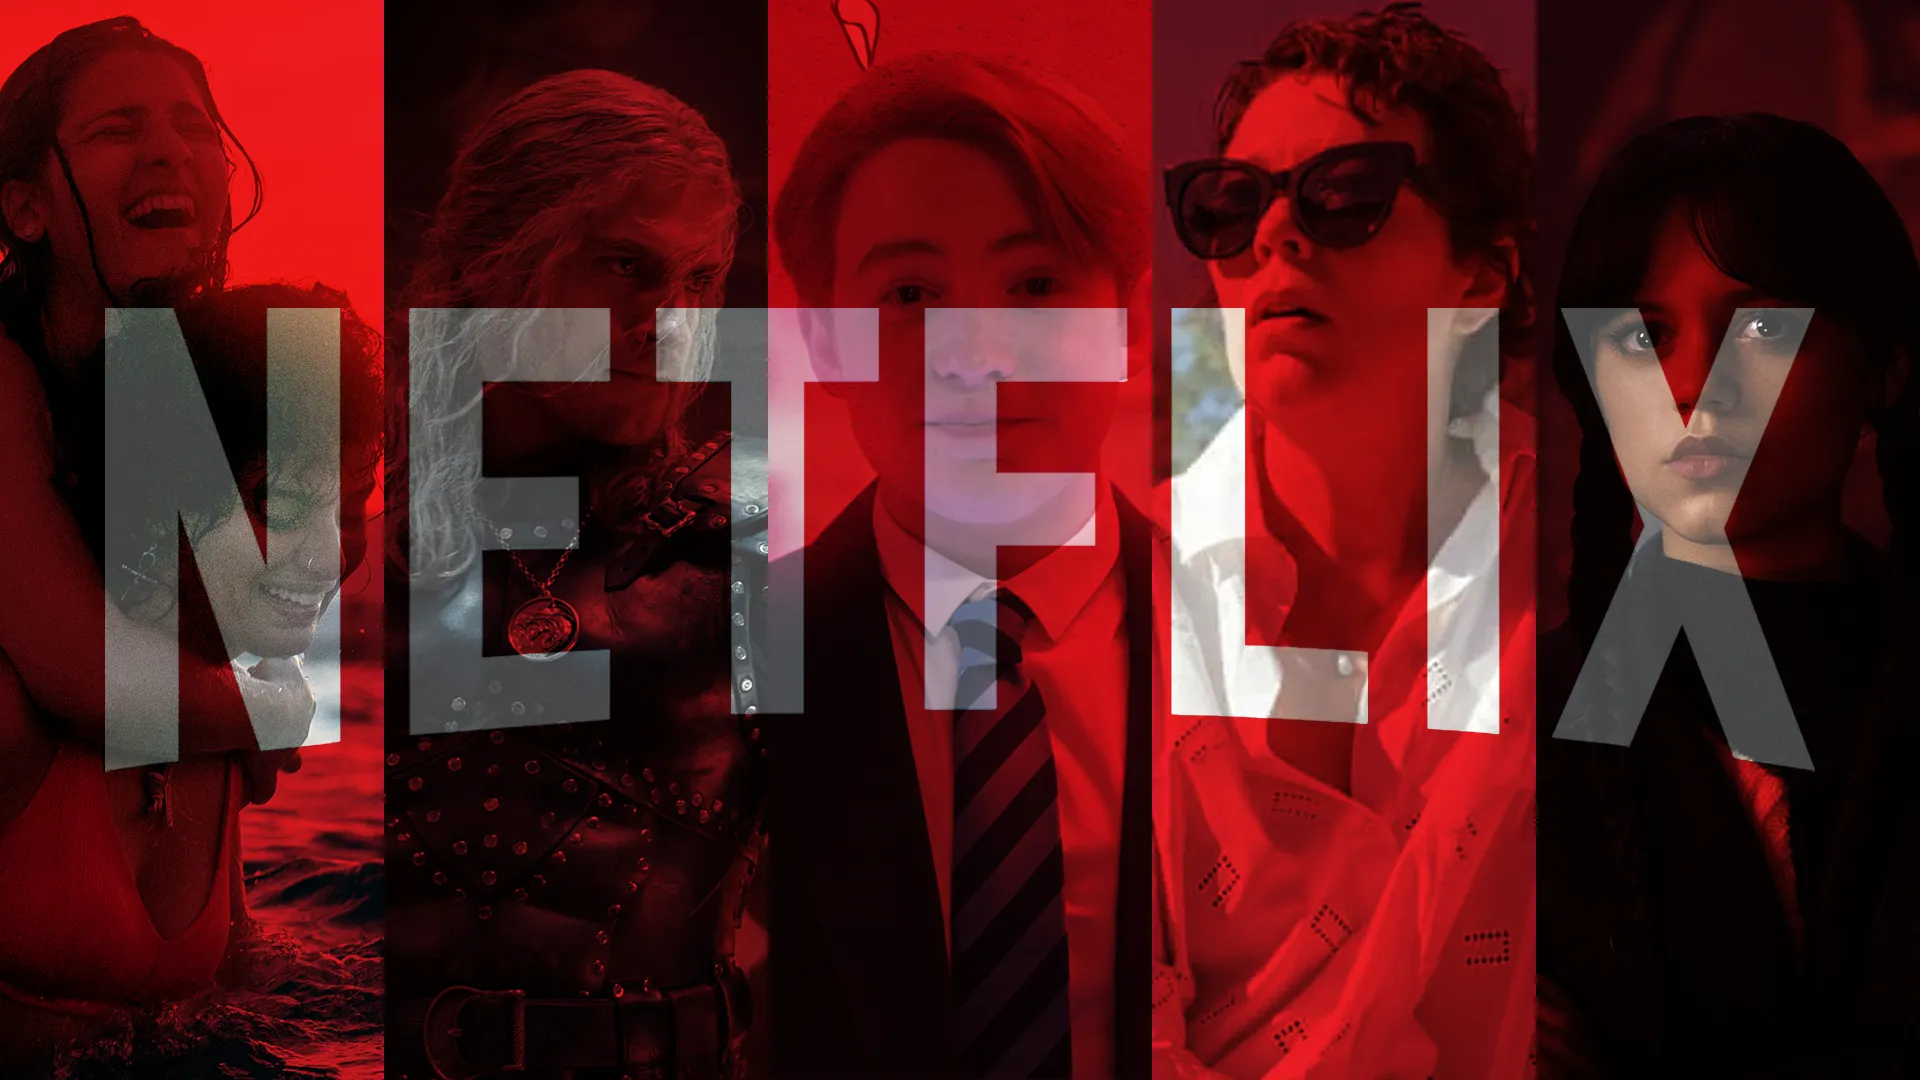

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [10]:
df_netflix = pd.read_csv('netflix_titles.csv/netflix_titles.csv')
df_netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Now checking the missing values via graph(heatmaps)

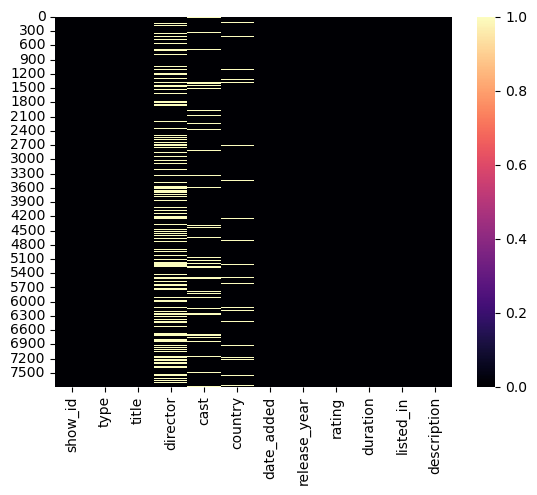

In [12]:
ax = sns.heatmap(df_netflix.isnull() ,cbar = {'orientation' :'horizontal'},
                 cmap = 'magma')
# rating and date_added wqont be shown in heatmaps ,for accuracy go for df_netlfix.isnull().sum()

 * director - 2389
 * cast - 718 
 * country - 507
 * date_added - 10 
 * rating - 7
 are having empty spaces. 
we can drop all missing rows w.r.t director,cast and fill country , date_added and rating

Now first lets add all the missing values that is country ,date_added,rating

In [13]:
df_netflix['country'] = df_netflix['country'].fillna(df_netflix['country'].mode()[0])
df_netflix['date_added'] = df_netflix['date_added'].fillna(df_netflix['date_added'].mode()[0])
df_netflix['rating'] = df_netflix['rating'].fillna(df_netflix['rating'].mode()[0])

Now dropping all empty space rows in director and cast column

In [14]:
df_netflix = df_netflix.dropna(how = 'any' , subset = ['director','cast'])

In [15]:
#now thr are no empty spaces now
df_netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now checking if there are any duplicated values

In [16]:
df_netflix.duplicated().sum()

0

In [17]:
df_netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."


Adding new column
* listed_in -> Genre

1) Now renaming the `listed_in column` as `Genre`  
2) `.apply(lambda x: x.split(",")[0])`: We're telling the table to go through each cell in the 'Genre' column and split text using commas(comma's are already present in Genre ,loook closely,now we are just splitting. Then, we keep only the first part. It's like simplifying a list of genres to just one genre per cell, in case there are multiple.


In [18]:
df_netflix = df_netflix.rename( columns = { "listed_in" :"Genre"})
df_netflix['Genre'] = df_netflix['Genre'].apply(lambda x : x.split(',')[0])
df_netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow..."


Now look at `date_added` August 14, 2020  
it contains               month , date ,year. 
Lets split it as month and year.

 `df_netflix['Month_added'] = df_netflix['date_added'].split(" ")[0]`  
 ```python 
 AttributeError: 'Series' object has no attribute 'split' 
 ```
 so using `.apply(x : x.split(" ")[0]`  
 We're telling the table to go through each cell in the 'Genre' column and split text using commas. Then, we keep only the first part. It's like simplifying a list of genres to just one genre per cell, in case there are multiple.   
**Issue**  
The issue is that `date_added` is in object format because of mixture of data types  
so we need to convert it to string so we that we can use string 
 

In [19]:
df_netflix['date_added'] = df_netflix['date_added'].astype(str)

Now we are creating `Month_add` and extracting the month from `date_added` column

In [20]:
df_netflix['Month_add'] = df_netflix['date_added'].apply(lambda x : x.split(' ')[0])

Now creating `Year_add` by splitting `date_added` using lambda and split

In [21]:
df_netflix['Year_add'] = df_netflix['date_added'].apply(lambda x : x.split(",")[-1])
df_netflix['Year_add'].head(5)

1     2016
2     2018
3     2017
4     2020
5     2017
Name: Year_add, dtype: object

In [22]:
df_netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,Month_add,Year_add
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,International TV Shows,A genetics professor experiments with a treatm...,July,2017


Their are different `types` and `Genre` so lets understand them

In [23]:
df_netflix['type'].value_counts()

type
Movie      4834
TV Show     145
Name: count, dtype: int64

|    Type   |  Count  |
|:---------:|:-------:|
|   Movie   |  5377   |
|  TV Show  |  2410   |

In [24]:
df_netflix['Genre'].value_counts()

Genre
Dramas                          1372
Comedies                        1054
Action & Adventure               711
Children & Family Movies         453
Documentaries                    365
Stand-Up Comedy                  296
Horror Movies                    243
International Movies             109
Classic Movies                    69
Thrillers                         49
International TV Shows            43
Movies                            32
Crime TV Shows                    31
Independent Movies                20
British TV Shows                  20
Anime Features                    18
Music & Musicals                  17
Kids' TV                          11
Sci-Fi & Fantasy                  11
Cult Movies                       11
Anime Series                       9
Docuseries                         9
Stand-Up Comedy & Talk Shows       7
TV Shows                           6
Romantic Movies                    3
TV Comedies                        3
TV Action & Adventure           

At first lets divide the DataFrame into two parts:  
1. Movie  
2. TV Show

In [35]:
Movie_df = df_netflix[df_netflix['type'] == 'Movie']
TvShow_df = df_netflix[df_netflix['type'] == 'TV Show']

## Using graphs to understand better

Generally lets find out Movie vs TV Show

|   **Style**  | **context**  |
|:------------------:|:---------------:|
|       white        |     poster      |
|       dark         |      paper      |
|     whitegrid      |    notebook     |
|     darkgrid       |      talk       |
|       ticks        |                |




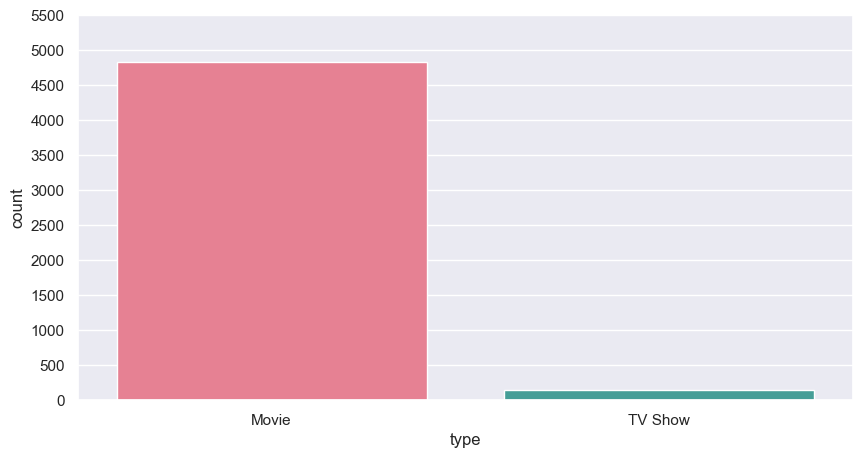

In [39]:
fig ,ax = plt.subplots(figsize = (10,5))
#plotting 
ax = sns.countplot( data = df_netflix ,
                    x = 'type' ,
                    palette = 'husl',
                    order =  ['Movie','TV Show'])
#increasing the tick length 
ax.set_yticks(range(0, 6000, 500));
#Styling 
sns.set( style = 'darkgrid',
         context = 'notebook')


Movies vs Tv Shows based on Genre

Now lets see different ratings in Movies  

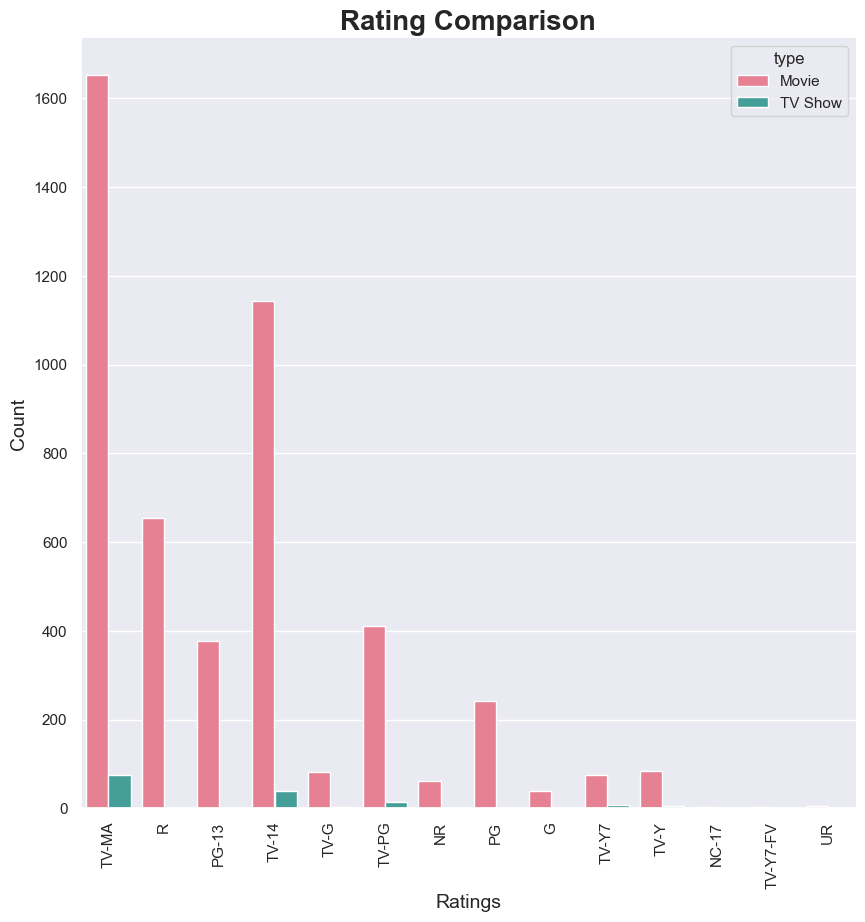

In [52]:
ax , fig = plt.subplots(figsize = (10,10))
ax = sns.countplot(data = df_netflix ,
                   x = 'rating' ,
                   hue = 'type',
                   palette = 'husl')
plt.xticks(rotation = 90);
sns.despine()
# labelling 
ax.set_xlabel('Ratings', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Rating Comparison', fontsize=20, fontweight = "bold")
#Styling
sns.set(style = 'darkgrid',
       context = 'notebook')
        
       

Say i only wanted to plot Movie and check rating then i can do it in 2 ways: 
1. Make a new data frame containg only 'Movie type' in it
    ```python 
    df_netflix['Movie_df'] = df_netflix[df_netflix['type'] == 'Movie']
    ```
 2. in countplot directly filter the type while mentioning data type


- `order=['rating'].value_counts().index[0:15]`: We're specifying the order of the bars based on the 15 most common ratings in 'movie_df'.

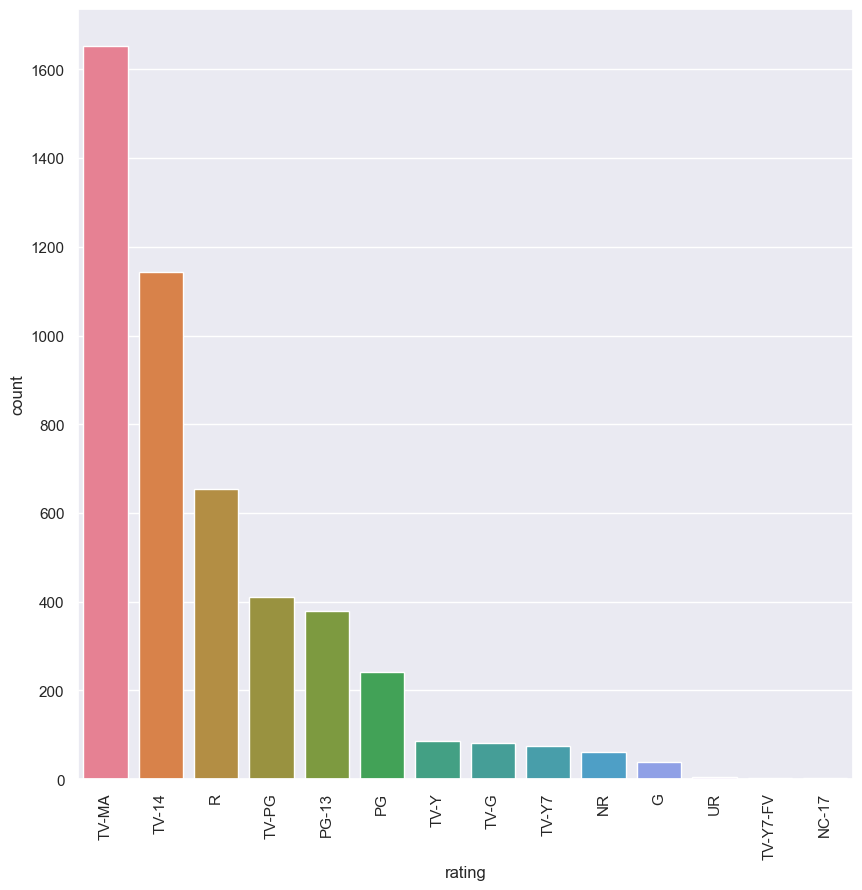

In [61]:
sns.set(style='darkgrid', context='notebook')
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(data=df_netflix[df_netflix['type'] == 'Movie'], 
              x='rating', 
              palette='husl',
              order=df_netflix['rating'].value_counts().index[0:15]);
plt.xticks(rotation=90);


what we understand from the gragh is that in movies 
1. TV-MA - Mature content highest
2. TV-14
3. R -R Rated

Similarly lets find out for TV shows,which kind of TV shows are watched

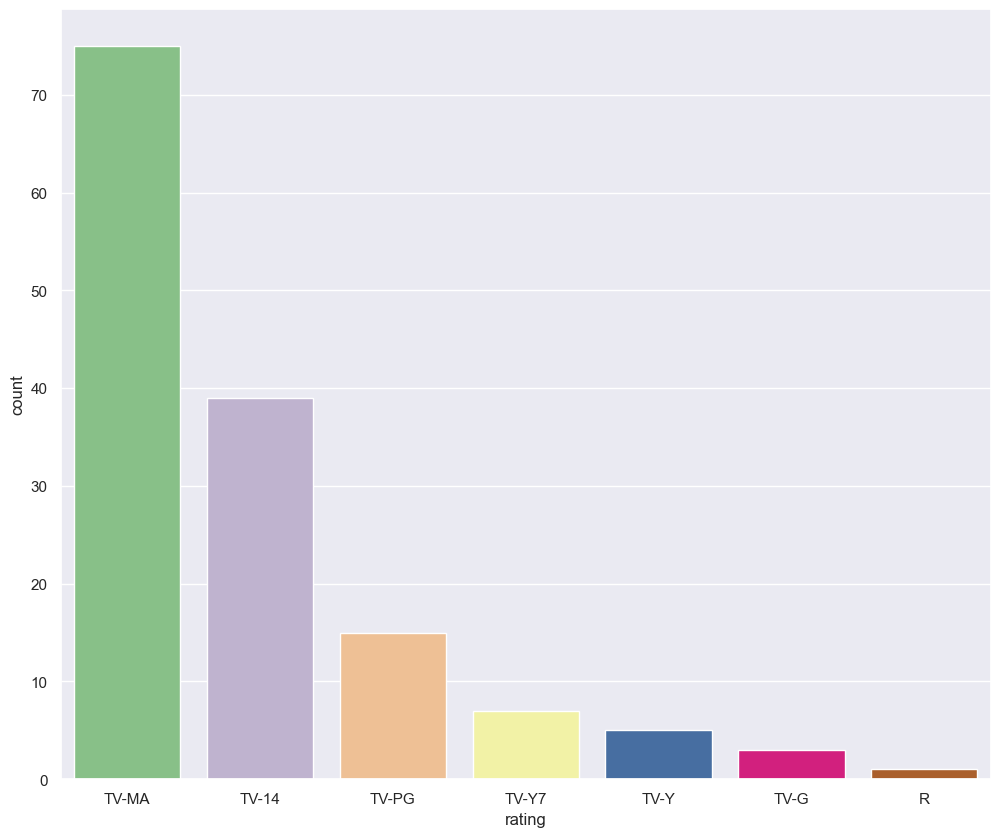

In [76]:
#plotting
ax , fig = plt.subplots(figsize = (12,10))
ax = sns.countplot(data = TvShow_df ,
                  x = 'rating' ,
                  palette = 'Accent',
                  order = TvShow_df['rating'].value_counts().index[0:15])
#Styling and labelling
sns.set( style = 'darkgrid',
        context = 'notebook')

In [78]:
df_netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,Month_add,Year_add
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",November,2017


Now based on release_year lets  lets see how many movies and TV Shows were out

dtype('O')

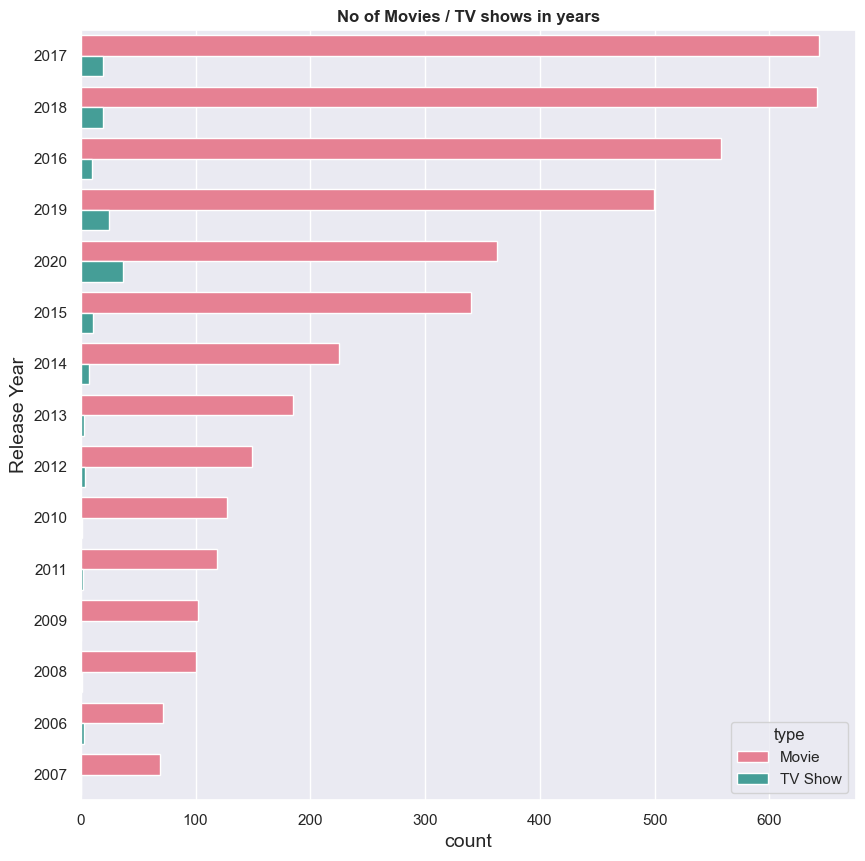

In [95]:
ax , fig = plt.subplots(figsize = (10,10))
ax = sns.countplot(data = df_netflix,
                   y = df_netflix['release_year'],
                   hue = df_netflix['type'],
                   palette = 'husl',
                   order = df_netflix['release_year'].value_counts().index[0:15])
#Styling 
ax.set_xlabel('count',fontsize = 14);
ax.set_ylabel('Release Year',fontsize = 14);
ax.set_title('No of Movies / TV shows in years',fontweight = 'bold');